In [3]:
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import scipy.signal as signal
import numpy as np

Load a music sample and play it.

In [4]:
coffee, fs = librosa.load("samples/095_Coffee_House_10s.wav")
ipd.Audio(coffee, rate=fs)

# FIR filters

Design a FIR filter with `kernel = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]`. Use [`np.convolve`](https://numpy.org/doc/2.0/reference/generated/numpy.convolve.html) to filter the music signal and listen to the result. What kind of filter is this? Note it down in this markdown cell.

Filter type: averaging filter (low-pass)

In [8]:
def averaging_filter(original_signal: np.array) -> np.array:
    return np.convolve(original_signal, list(range(10)))

ipd.Audio(averaging_filter(coffee), rate=fs)

Repeat the previous exercise, but now with filter kernel `kernel = [1, -1]` and listen to the result. What kind of filter is this? Note it down in this markdown cell.

Filter type: high-pass

In [9]:
def _filter(original_signal: np.array) -> np.array:
    return np.convolve(original_signal, [1, -1])

ipd.Audio(_filter(coffee), rate=fs)

# Reverb

Reverberation can be achieved by convolving a room impulse response with another signal. Load the room impulse response `samples/room_ir.wav` and play it.

In [11]:
room_ir, fs = librosa.load("samples/room_ir.wav")
ipd.Audio(room_ir, rate=fs)

Convolve the impulse response with the music signal and listen to it. What does it sounds like?

In [12]:
ipd.Audio(np.convolve(room_ir, coffee), rate=fs)

# IIR filters

Build an IIR filter with [`signal.lfilter`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html) with numerator coefficients `b=[1]` and denominator coefficients `a=[1, -0.95]`. Play the signal. How many feed forward taps and feedback taps does this filter have (number of $Z^{-1}$ blocks)? 1

![iir filter structure](https://wirelesspi.com/wp-content/uploads/2023/02/figure-iir-biquad.png)

In [17]:
filtered_coffee = signal.lfilter([1], [1, -0.95], coffee)
ipd.Audio(data=filtered_coffee, rate=fs)

In [8]:
# ... WRITE YOUR CODE HERE ... #

Design a low-pass second order butterworth filter with a -3dB point at 400Hz with [`signal.butter`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html). Print the numerator and denominator coefficients and plot the filter frequency response using `plot_filter_frequency_response`. Apply the filter design to the music and listen to the output.

What is the attenuation in dB/decade? What is the maximum phase shift? Which filter design parameter determines these two properties? Write your answer in this markdown cell.

In [23]:
b, a = signal.butter(N=2, Wn=400, btype="lowpass", output="ba", fs=fs)

In [24]:
def plot_filter_frequency_response(b, a, fs):
    """Plot the frequency and phase response of a digital IIR filter design

    Args:
        b:  numerator coefficients
        a:  denominator coefficients
        fs: sample frequency
    """
    w, h = signal.freqz(b, a, fs=fs)
    db = 20 * np.log10(abs(h))
    phase = np.unwrap(np.angle(h)) * 180/np.pi
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.semilogx(w, db)
    plt.title('Filter frequency response')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude [dB]')
    plt.grid(which='both', axis='both')
    plt.subplot(1, 2, 2)
    plt.semilogx(w, phase)
    plt.title('Filter phase response')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Angle [degree]')
    plt.grid(which='both', axis='both')
    plt.show()

# keep

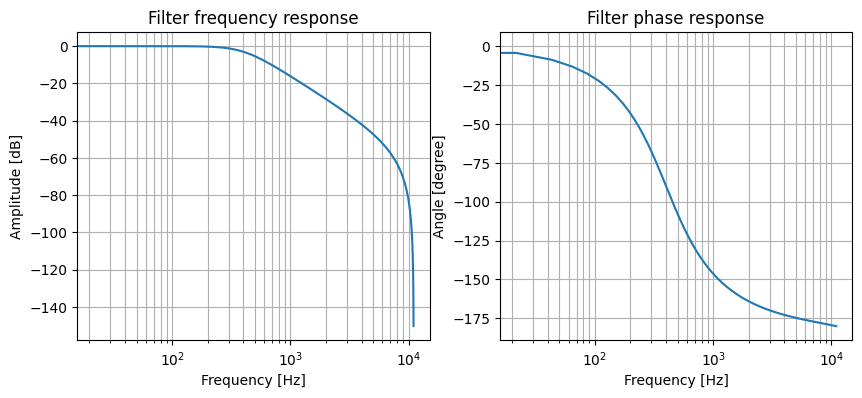

In [25]:
plot_filter_frequency_response(b=b, a=a, fs=fs)

Generate the impulse response of the filter using [`signal.dimpulse`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dimpulse.html). Plot the first 200 samples of the response.

Convert the previous filter to a high-pass filter. Given only the impulse response, how can you see if it is from a low-pass or high-pass filter? Write your answer in this markdown cell.

Text(0, 0.5, 'Amplitude')

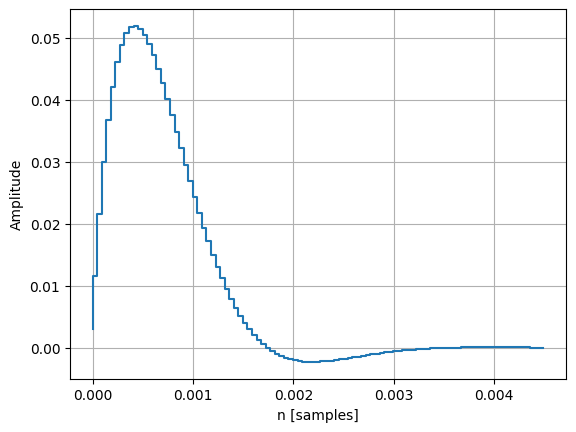

In [30]:
t, y = signal.dimpulse(system=(b, a, 1/fs))
plt.step(t, np.squeeze(y))
plt.grid()
plt.xlabel('n [samples]')
plt.ylabel('Amplitude')

Design a butterworth band-pass filter with -3dB cutoff frequencies $f_l = 400Hz$ and $f_h = 900Hz$. Below $200Hz$ and above $1800Hz$, the attenuation must be at least -40dB. Use [`signal.buttord`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.buttord.html) to estimate the order of the required butterworth filter and `signal.butter` to design the final filter. Plot its frequency response using `plot_filter_frequency_response`, play the filtered signal and plot the filtered log spectrogram.

In [33]:
ord, wn = signal.buttord(wp=[400/fs, 900/fs], ws=[200/fs, 1800/fs], gpass=3, gstop=40, fs=fs)
print(f"ord={ord}, wn={wn}")


ord=4, wn=[0.01813645 0.04082565]


Generate the impulse response of the filter using [`signal.dimpulse`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dimpulse.html). Plot the first 600 samples of the response.

In [ ]:
# ... WRITE YOUR CODE HERE ... #